In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv('/kaggle/input/sales-data/Sales_Data.csv')

In [3]:
sales.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [5]:
sales.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [6]:
sales.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [7]:
sales.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [8]:
sales.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [9]:
#Removing columns 
sales=sales.drop(columns=(['Unnamed: 0']))

In [10]:
#data preprocessing
sales['Sales']=sales['Sales'].astype('int64')

In [11]:
#Weekly sales 
sales['Order Date']=pd.to_datetime(sales['Order Date'])
sales['Weekday']= sales['Order Date'].dt.strftime('%A')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_sales_by_weekdays=sales.groupby('Weekday')['Sales'].sum()
total_sales_by_weekdays = total_sales_by_weekdays.reindex(weekday_order, level=0)
total_sales_by_weekdays=total_sales_by_weekdays.reset_index()

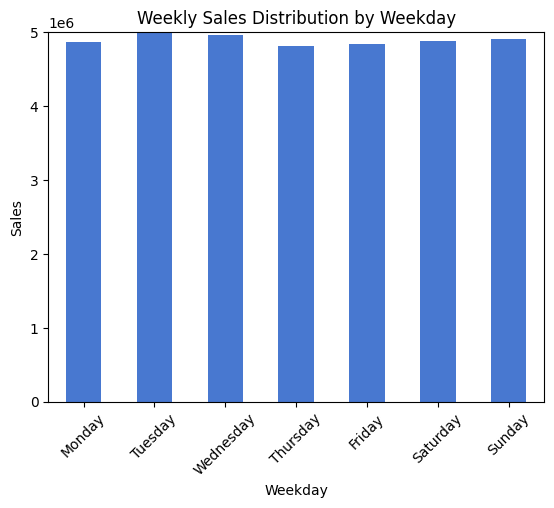

In [12]:
#Weekly sales visualization
sns.set_palette('muted')
#weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales.groupby('Weekday')['Sales'].sum().loc[weekday_order].plot(kind='bar')
plt.title('Weekly Sales Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.ylim(0,5000000)
plt.show()

In [13]:
#Number of products available
print(sales['Product'].nunique())
Products_list= sales['Product'].unique()
Products_list

19


array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [14]:
#Number of cities operating
print(sales['City'].nunique())
City_list=sales['City'].unique()
City_list


9


array([' New York City', ' San Francisco', ' Atlanta', ' Portland',
       ' Dallas', ' Los Angeles', ' Boston', ' Austin', ' Seattle'],
      dtype=object)

In [15]:
#Total Sales
sales['Sales'].agg(sum)

34354615

In [16]:
#Total Quantity ordered
sales['Quantity Ordered'].agg(sum)

209079

In [17]:
#Sales by product and city
cities_by_highsales=sales.groupby(['City'])['Sales'].agg([sum]).sort_values(by='sum',ascending=False).reset_index()
cities_by_highsales

,City,sum
0,San Francisco,8229136
1,Los Angeles,5430629
2,New York City,4645903
3,Boston,3646904
4,Atlanta,2784555
5,Dallas,2757017
6,Seattle,2736881
7,Portland,2311293
8,Austin,1812297


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' San Francisco'),
  Text(1, 0, ' Los Angeles'),
  Text(2, 0, ' New York City'),
  Text(3, 0, ' Boston'),
  Text(4, 0, ' Atlanta')])

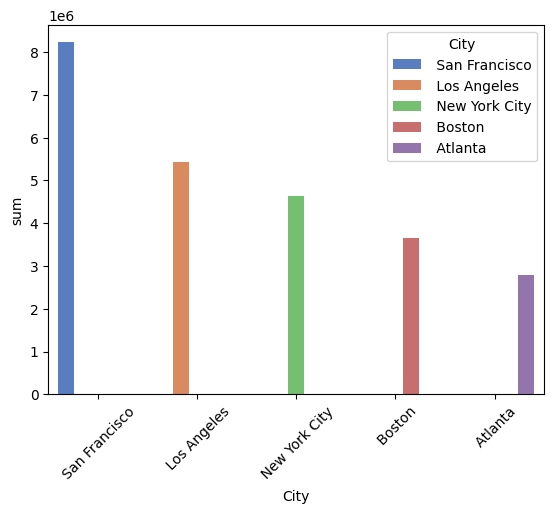

In [18]:

sns.barplot(data=cities_by_highsales.head(), x='City' , y='sum' , hue='City')
plt.xticks(rotation=45)

In [19]:
# Total monthly Sales 
monthly_sale_group=sales.groupby(['Month'])['Sales'].agg(sum).reset_index()
monthly_sale_group

,Month,Sales
0,1,1815143
1,2,2193165
2,3,2795907
3,4,3377215
4,5,3140375
5,6,2567871
6,7,2637209
7,8,2235667
8,9,2088915
9,10,3721615


Text(0, 0.5, 'Total Sales')

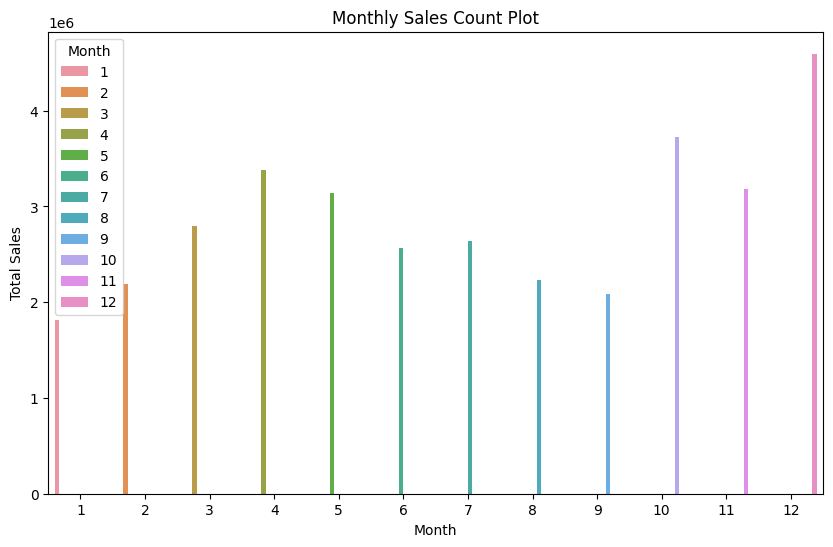

In [20]:

# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=monthly_sale_group, hue='Month')

# Customize the plot
plt.title('Monthly Sales Count Plot')
plt.xlabel('Month')
plt.ylabel('Total Sales')

In [21]:
# Higher sales in monthlywise
higher_sales=sales.groupby(['Month'])['Sales'].agg(sum).sort_index(ascending=False)
higher_sales.head()

Month
12    4594929
11    3186604
10    3721615
9     2088915
8     2235667
Name: Sales, dtype: int64

In [22]:
#Top 5 sales by product and the total revenue
# Assuming 'sales' is your DataFrame
highsales = sales.groupby(['Product'])['Sales'].agg(sum).sort_values(ascending=False).reset_index()
print(highsales)

total_revenue = highsales.sum()
print(total_revenue)


                       Product    Sales
0           Macbook Pro Laptop  8037600
1                       iPhone  4794300
2              ThinkPad Laptop  4125872
3                 Google Phone  3319200
4       27in 4K Gaming Monitor  2428930
5       34in Ultrawide Monitor  2349439
6     Apple Airpods Headphones  2349150
7                Flatscreen TV  1445700
8   Bose SoundSport Headphones  1332375
9             27in FHD Monitor  1124993
10             Vareebadd Phone   827200
11                20in Monitor   450089
12          LG Washing Machine   399600
13                    LG Dryer   387600
14    Lightning Charging Cable   326597
15        USB-C Charging Cable   265797
16            Wired Headphones   227802
17       AA Batteries (4-pack)    89961
18      AAA Batteries (4-pack)    72410
Product    Macbook Pro LaptopiPhoneThinkPad LaptopGoogle ...
Sales                                               34354615
dtype: object


Text(0.5, 1.0, 'Top 5 products by sale count')

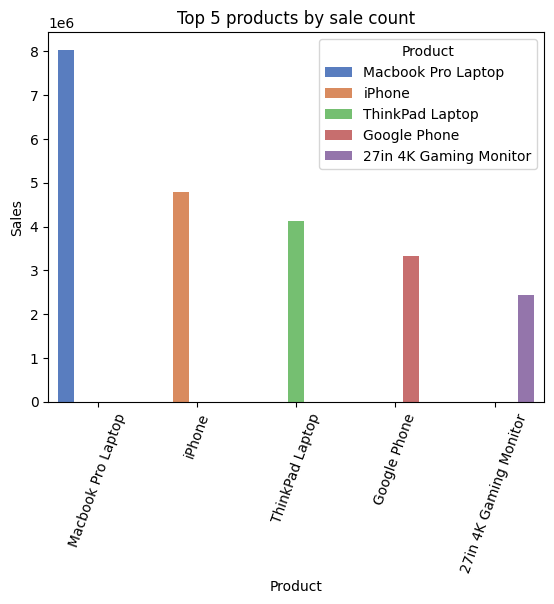

In [23]:
sns.barplot(data=highsales.head(), x='Product' , y='Sales' ,hue='Product')
plt.xticks(rotation=70)
plt.title('Top 5 products by sale count')

In [24]:
#Top 5 best selling products
high_selling_products=sales.groupby(['Product'])['Quantity Ordered'].agg(sum).sort_values(ascending=False).reset_index()
high_selling_products
high_selling_products.head()
# 5 Low selling products
high_selling_products.tail()

,Product,Quantity Ordered
14,ThinkPad Laptop,4130
15,20in Monitor,4129
16,Vareebadd Phone,2068
17,LG Washing Machine,666
18,LG Dryer,646


Text(0.5, 1.0, 'Top 5  best selling products')

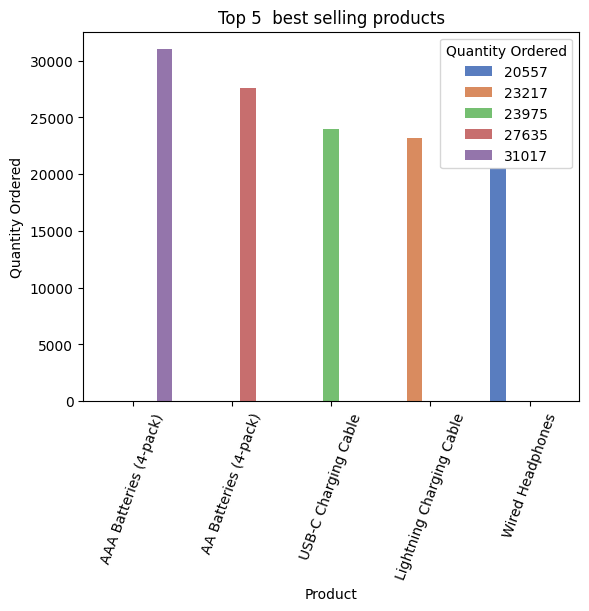

In [25]:
sns.barplot(data=high_selling_products.head(), x='Product', y='Quantity Ordered' , hue='Quantity Ordered')
plt.xticks(rotation=70)
plt.title('Top 5  best selling products')


In [26]:
#Top 5 cities by sales
top_cities_by_sales=sales.groupby(['City'])['Sales'].agg(sum).sort_values(ascending=False).reset_index()
top_cities_by_sales


,City,Sales
0,San Francisco,8229136
1,Los Angeles,5430629
2,New York City,4645903
3,Boston,3646904
4,Atlanta,2784555
5,Dallas,2757017
6,Seattle,2736881
7,Portland,2311293
8,Austin,1812297


Text(0.5, 1.0, 'Top 5 cities by Sales count')

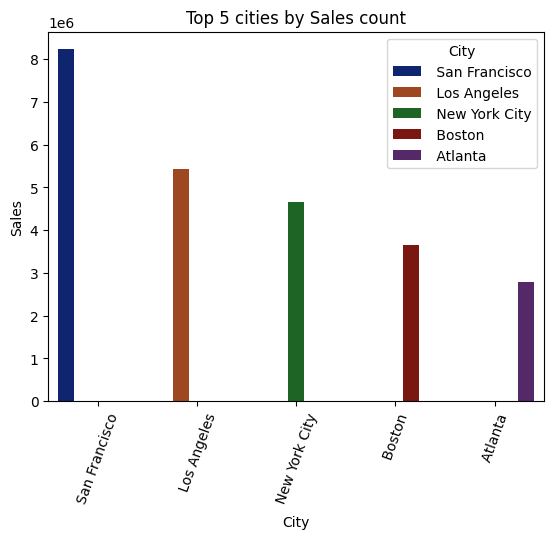

In [27]:
sns.barplot(data=top_cities_by_sales.head(), x='City' ,y='Sales' , hue='City' , palette='dark')
plt.xticks(rotation=70)
plt.title('Top 5 cities by Sales count')

In [28]:
#Quantity ordered in each month groupby product and month
pivot_table = sales.groupby(['Product', 'City', 'Month'])['Quantity Ordered'].agg(sum).reset_index()
pivot_table = pivot_table.pivot_table(index=['Product'], columns='Month', values='Quantity Ordered',aggfunc=sum, fill_value=0)
pivot_table

Month,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
20in Monitor,218,246,326,393,341,322,327,261,277,429,420,569
27in 4K Gaming Monitor,313,427,479,566,542,451,483,440,381,723,575,864
27in FHD Monitor,422,475,608,736,689,567,607,491,483,791,719,962
34in Ultrawide Monitor,314,418,522,654,544,455,462,380,379,671,551,849
AA Batteries (4-pack),1424,1735,2216,2821,2384,2096,2071,1828,1771,2940,2625,3724
AAA Batteries (4-pack),1600,1972,2479,2939,2927,2162,2365,2021,1923,3363,3025,4241
Apple Airpods Headphones,818,1012,1322,1519,1365,1167,1220,1009,969,1671,1513,2076
Bose SoundSport Headphones,662,841,1198,1287,1176,983,1060,881,828,1465,1252,1824
Flatscreen TV,244,313,362,460,399,367,399,331,294,524,460,666


In [29]:
#Quantity ordered groupby city and product
pivot_table_product_quantity=sales.pivot_table('Quantity Ordered', index=['City'], columns='Product')
pivot_table_product_quantity.sort_index()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
City,,,,,,,,,,,,,,,,,,,
Atlanta,1.011834,1.002033,1.006849,1.008368,1.320289,1.476220,1.002375,1.006500,1.004938,1.000000,1.0,1.0,1.071266,1.000000,1.000000,1.080090,1.000000,1.092734,1.003690
Austin,1.008772,1.000000,1.011236,1.000000,1.329599,1.528873,1.005669,1.018732,1.000000,1.000000,1.0,1.0,1.065200,1.000000,1.000000,1.093531,1.000000,1.104594,1.000000
Boston,1.000000,1.002972,1.005044,1.002990,1.361625,1.504129,1.006699,1.009986,1.005445,1.001689,1.0,1.0,1.072320,1.002092,1.002242,1.097728,1.000000,1.097284,1.001330
Dallas,1.008824,1.004175,1.012069,1.001957,1.335499,1.517576,1.005897,1.007583,1.002387,1.000000,1.0,1.0,1.083721,1.000000,1.000000,1.095210,1.000000,1.101650,1.000000
Los Angeles,1.006116,1.000000,1.004930,1.002099,1.349346,1.499245,1.008564,1.012387,1.004144,1.003550,1.0,1.0,1.074032,1.000000,1.000000,1.094962,1.000000,1.074597,1.000895
New York City,1.009009,1.002381,1.002806,1.003468,1.357009,1.487198,1.009139,1.012987,1.004800,1.000000,1.0,1.0,1.062915,1.001524,1.001789,1.097717,1.007168,1.087149,1.000000
Portland,1.003610,1.002309,1.003788,1.002488,1.349339,1.530537,1.009183,1.006795,1.003215,1.000000,1.0,1.0,1.066899,1.000000,1.000000,1.085048,1.000000,1.098387,1.002227
San Francisco,1.007049,1.002747,1.006101,1.002774,1.336937,1.502028,1.007557,1.009127,1.004352,1.002214,1.0,1.0,1.074024,1.001764,1.000000,1.097988,1.002028,1.081446,1.000602
Seattle,1.006211,1.003731,1.003466,1.001876,1.334354,1.506158,1.006400,1.004730,1.002674,1.000000,1.0,1.0,1.074455,1.000000,1.000000,1.096831,1.000000,1.094765,1.001835
